In [12]:
import os
import glob
import fnmatch
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import math
import tensorflow as tf

In [13]:
data_path = "./heartbeat/"
print(os.listdir(data_path))

['artifact', 'extrahls', 'extrastole', 'murmur', 'normal', 'unlabel']


In [14]:
train_data      = data_path 
unlabel_data    = data_path  + "/unlabel/"

normal_data     = train_data + '/normal/'
murmur_data     = train_data + '/murmur/'
extrastole_data = train_data + '/extrastole/'
artifact_data   = train_data + '/artifact/'
extrahls_data   = train_data + "/extrahls/"

In [15]:
print("Normal files:", len(os.listdir(normal_data)))
print("Murmur files:", len(os.listdir(murmur_data))) 
print("Extrastole files", len(os.listdir(extrastole_data))) 
print("Artifact files:", len(os.listdir(artifact_data))) 
print("Extrahls files:", len(os.listdir(extrahls_data)))

print('TOTAL TRAIN SOUNDS:', len(os.listdir(normal_data)) 
                              + len(os.listdir(murmur_data))
                              + len(os.listdir(extrastole_data))
                              + len(os.listdir(artifact_data))
                              + len(os.listdir(extrahls_data)))

Normal files: 351
Murmur files: 129
Extrastole files 46
Artifact files: 40
Extrahls files: 19
TOTAL TRAIN SOUNDS: 585


In [16]:
print("Test sounds: ", len(os.listdir(unlabel_data)))

Test sounds:  247


# EDA and Visualization

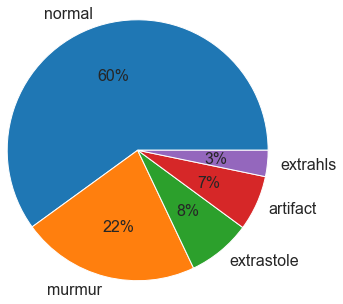

In [18]:
x = np.array([len(os.listdir(normal_data)),
              len(os.listdir(murmur_data)),
              len(os.listdir(extrastole_data)),
              len(os.listdir(artifact_data)),
              len(os.listdir(extrahls_data))])
labels = ['normal', 'murmur', 'extrastole', 'artifact', 'extrahls']
plt.pie(x, labels = labels, autopct = '%.0f%%', radius= 1.5, textprops={'fontsize': 16})
plt.show()

## Visualizing random sample

In [20]:
def visulize_random_sample(folder_name):
  #to hear the audio sample
  random_sample             = np.random.randint(0,len(os.listdir(folder_name)))
  sample_sound              = os.listdir(folder_name)[random_sample]
  sample_address            = folder_name + sample_sound
  sample_sound, sample_rate = librosa.load(sample_address)
  sample_audio              = ipd.Audio(sample_sound, rate=sample_rate)
  return sample_audio


In [21]:
visulize_random_sample(normal_data)

## *1. Normal sound*

In [22]:
# Choose random sound from normal folder
random_normal= np.random.randint(0,len(os.listdir(normal_data))) 
normal_sound = os.listdir(normal_data)[random_normal]
normal_sound_address = normal_data+normal_sound
normal_sound_sample,sample_rate = librosa.load(normal_sound_address)
ipd.Audio(normal_sound_sample,rate=sample_rate)

### Waveform

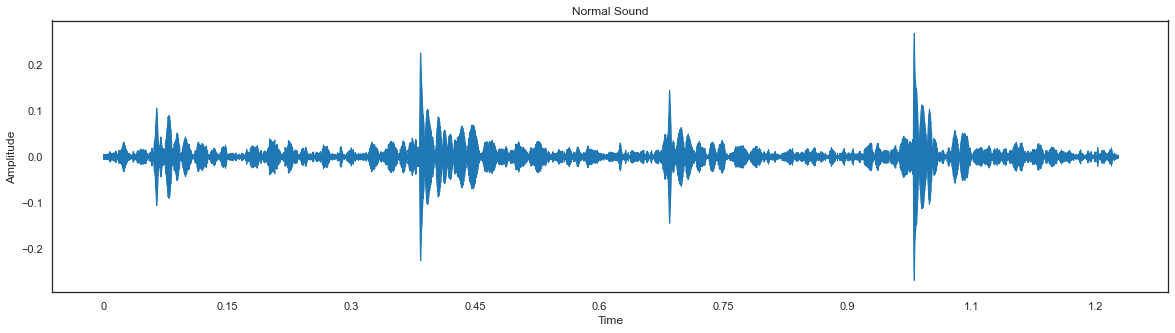

In [25]:
#librosa.display.waveshow(data, sr=sampling_rate)

plt.figure(figsize=(20,5))
librosa.display.waveshow(normal_sound_sample, sr = sample_rate)
plt.title("Normal Sound")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Spectrum

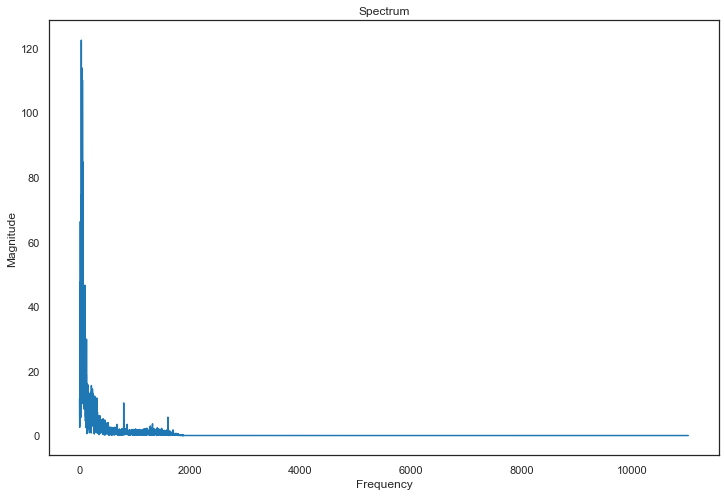

In [26]:
fft_normal = np.fft.fft(normal_sound_sample)
magnitude_normal = np.abs(fft_normal)
freq_normal = np.linspace(0,sample_rate, len(magnitude_normal)) 
half_freq = freq_normal[:int(len(freq_normal)/2)]
half_magnitude = magnitude_normal[:int(len(freq_normal)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.title("Spectrum")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### Spectogram

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram')

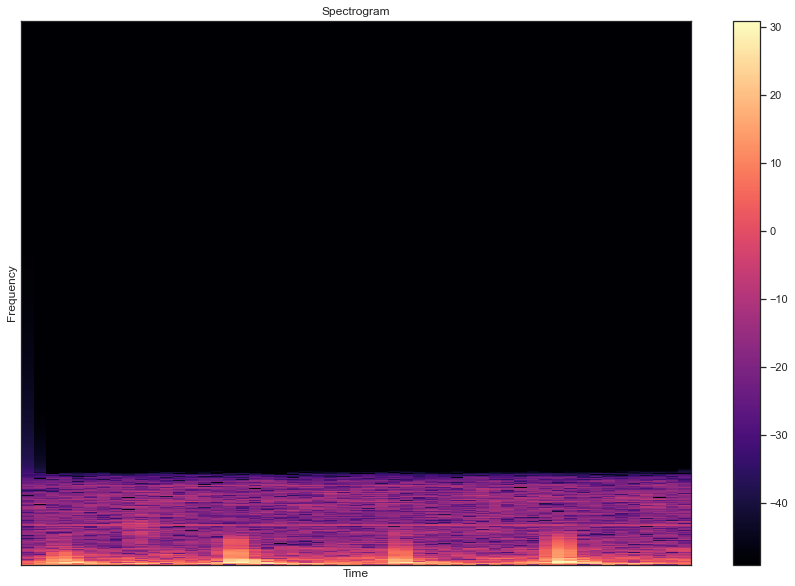

In [27]:
hop_length = 512
n_fft = 2048

hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

stft_normal = librosa.stft(normal_sound_sample, n_fft=n_fft, hop_length=hop_length)

spectrogram = np.abs(stft_normal)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("Spectrogram")

### MFCCs

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7676\452083064.py:3: FutureWarning: Pass y=[ 0.00561447  0.00552527  0.00506324 ... -0.00239471 -0.00167614
  0.        ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(normal_sound_sample, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)


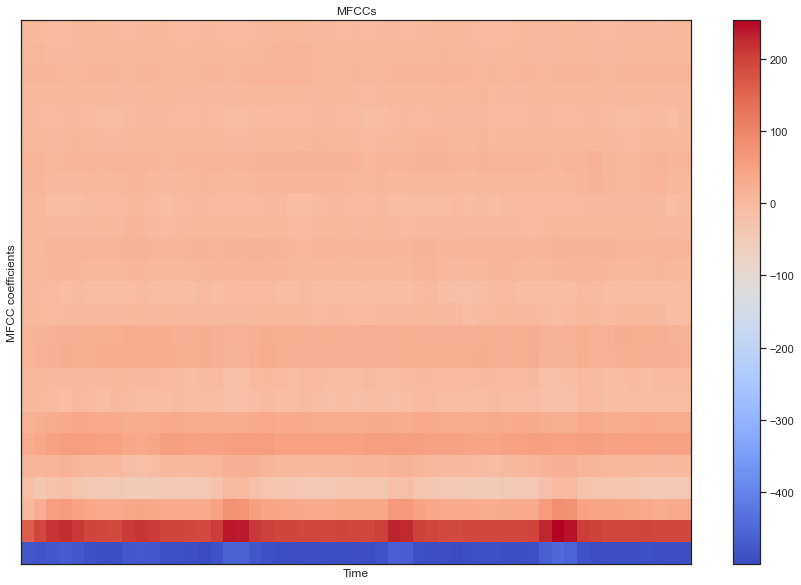

In [28]:
MFCCs = librosa.feature.mfcc(normal_sound_sample, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("MFCCs")
plt.show()

## *2. Murmur sound*

In [29]:
random_murmur= np.random.randint(0,len(os.listdir(murmur_data))) 
murmur_sound = os.listdir(murmur_data)[random_murmur]
murmur_sound_address = murmur_data+murmur_sound
murmur_sound_sample,sample_rate = librosa.load(murmur_sound_address)
ipd.Audio(murmur_sound_sample,rate=sample_rate)

### Waveform

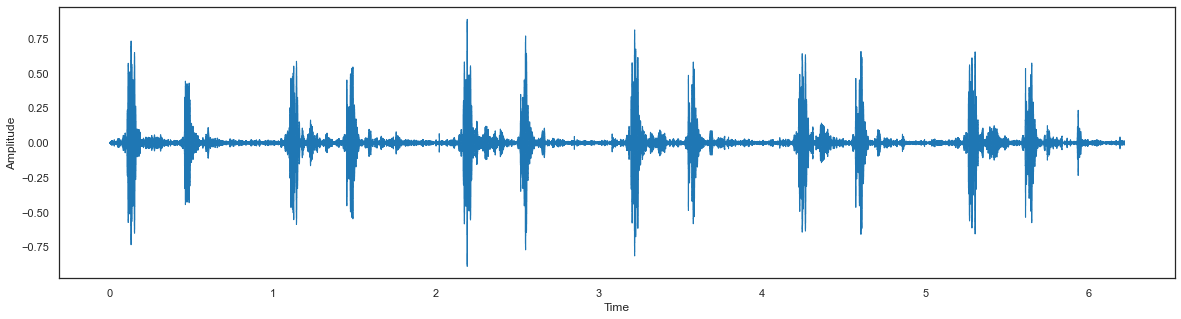

In [31]:
plt.figure(figsize=(20,5))
librosa.display.waveshow(murmur_sound_sample, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Spectrum

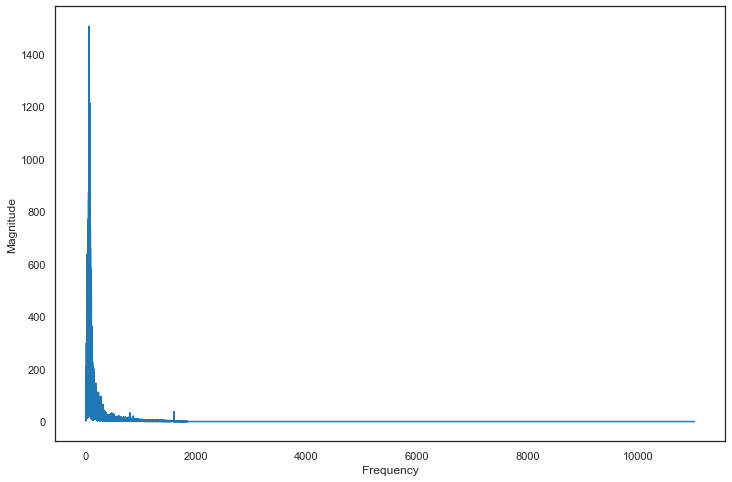

In [32]:
fft_murmur = np.fft.fft(murmur_sound_sample)
magnitude_murmur = np.abs(fft_murmur)
freq_murmur = np.linspace(0,sample_rate, len(magnitude_murmur)) 
half_freq = freq_murmur[:int(len(freq_murmur)/2)]
half_magnitude = magnitude_murmur[:int(len(freq_murmur)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### Spectogram

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram_murmur')

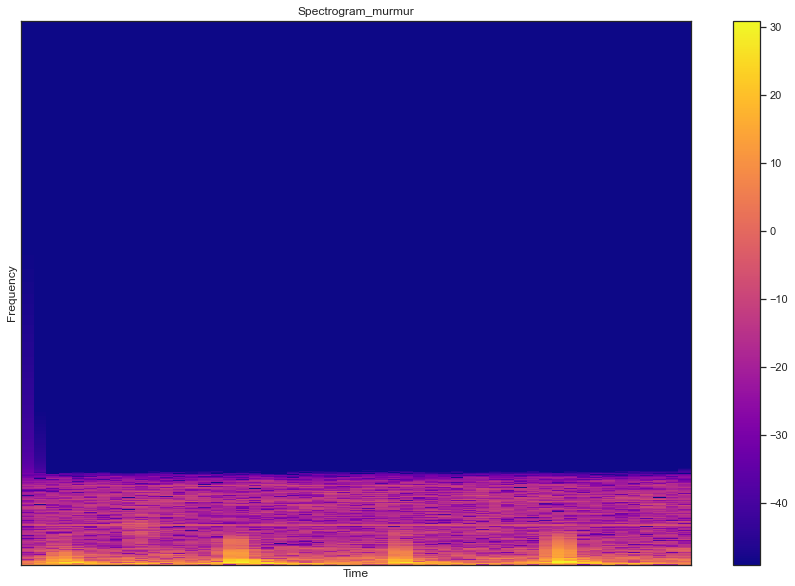

In [33]:
hop_length = 512
n_fft = 2048

hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

stft_murmur = librosa.stft(murmur_sound_sample, n_fft=n_fft, hop_length=hop_length)

spectrogram_murmur = np.abs(stft_murmur)
log_spectrogram_murmur = librosa.amplitude_to_db(spectrogram_murmur)

plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("plasma")
plt.title("Spectrogram_murmur")

### MFCCs

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7676\4010189450.py:3: FutureWarning: Pass y=[-0.00108943 -0.00130227 -0.00156851 ... -0.00017717 -0.00012332
  0.        ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs_murmur = librosa.feature.mfcc(murmur_sound_sample, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)


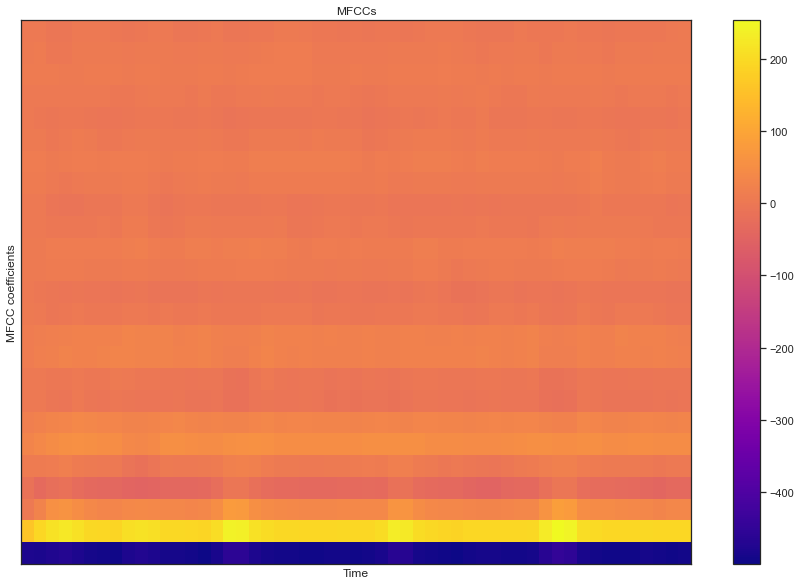

In [34]:
MFCCs_murmur = librosa.feature.mfcc(murmur_sound_sample, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.set_cmap("plasma")
plt.title("MFCCs")
plt.show()

## *3. Extrasystole sound*

In [35]:
random_extrastole= np.random.randint(0,len(os.listdir(extrastole_data))) 
extrastole_sound = os.listdir(extrastole_data)[random_extrastole]
extrastole_sound_address = extrastole_data+extrastole_sound
extrastole_sound_sample,sample_rate = librosa.load(extrastole_sound_address)
ipd.Audio(extrastole_sound_sample,rate=sample_rate)

### Waveform

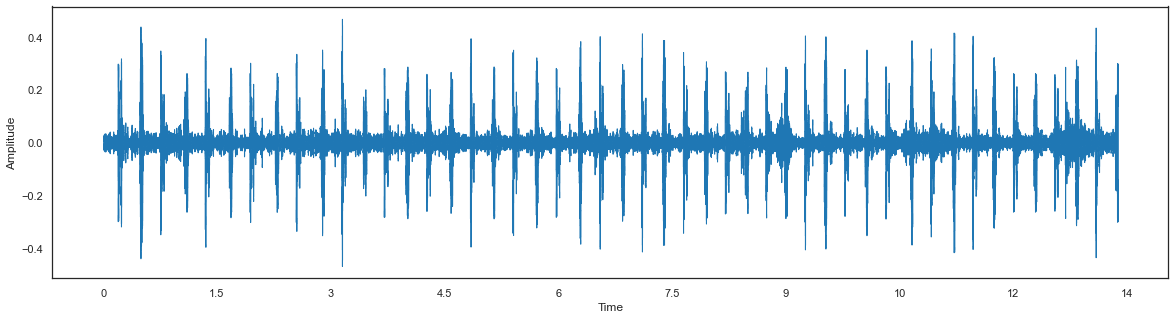

In [37]:
plt.figure(figsize=(20,5))
librosa.display.waveshow(extrastole_sound_sample, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Spectrum

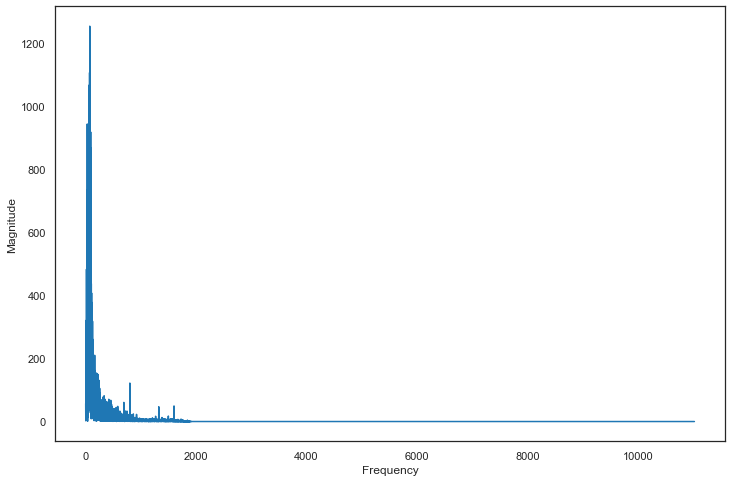

In [38]:
fft_extrastole = np.fft.fft(extrastole_sound_sample)
magnitude_extrastole = np.abs(fft_extrastole)
freq_extrastole = np.linspace(0,sample_rate, len(magnitude_extrastole)) 
half_freq = freq_extrastole[:int(len(freq_extrastole)/2)]
half_magnitude = magnitude_extrastole[:int(len(freq_extrastole)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### Spectogram

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram_extrastole')

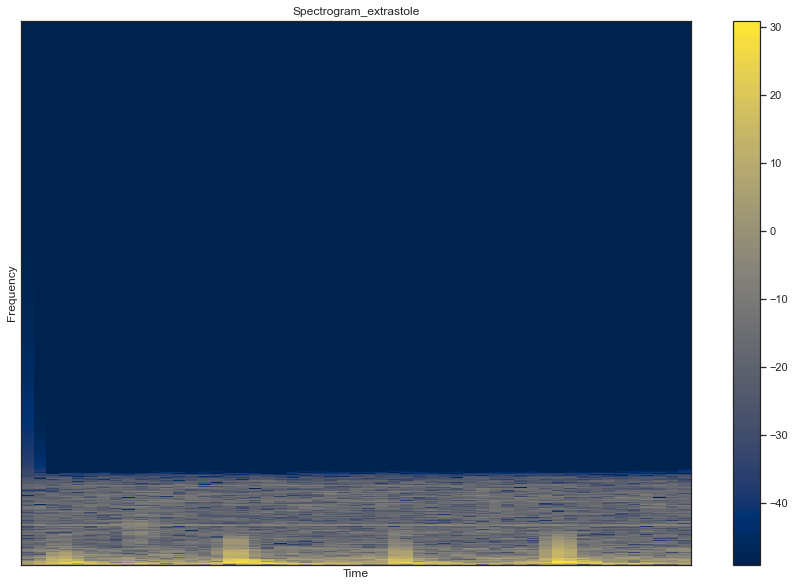

In [39]:
hop_length = 512
n_fft = 2048

hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

stft_extrastole = librosa.stft(extrastole_sound_sample, n_fft=n_fft, hop_length=hop_length)

spectrogram_extrastole = np.abs(stft_extrastole)
log_spectrogram_extrastole = librosa.amplitude_to_db(spectrogram_extrastole)

plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("cividis")
plt.title("Spectrogram_extrastole")

### MFCCs

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7676\1865898672.py:3: FutureWarning: Pass y=[-0.02291139 -0.02504499 -0.02596783 ...  0.04953508  0.02948958
  0.        ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs_extrastole = librosa.feature.mfcc(extrastole_sound_sample, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)


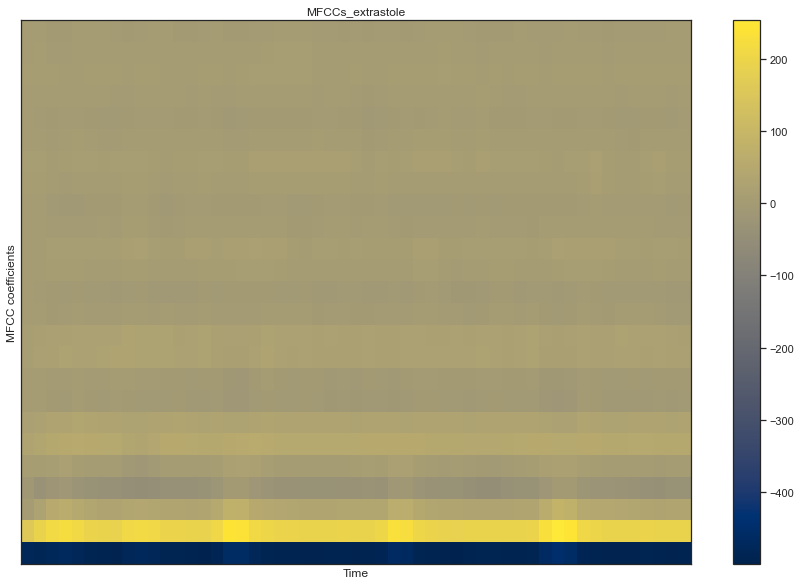

In [40]:
MFCCs_extrastole = librosa.feature.mfcc(extrastole_sound_sample, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.set_cmap("cividis")
plt.title("MFCCs_extrastole")
plt.show()

## *4. Artifact sound*

In [41]:
random_artifact= np.random.randint(0,len(os.listdir(artifact_data))) 
artifact_sound = os.listdir(artifact_data)[random_artifact]
artifact_sound_address = artifact_data+artifact_sound
artifact_sound_sample,sample_rate = librosa.load(artifact_sound_address)
ipd.Audio(artifact_sound_sample,rate=sample_rate)

### Waveform

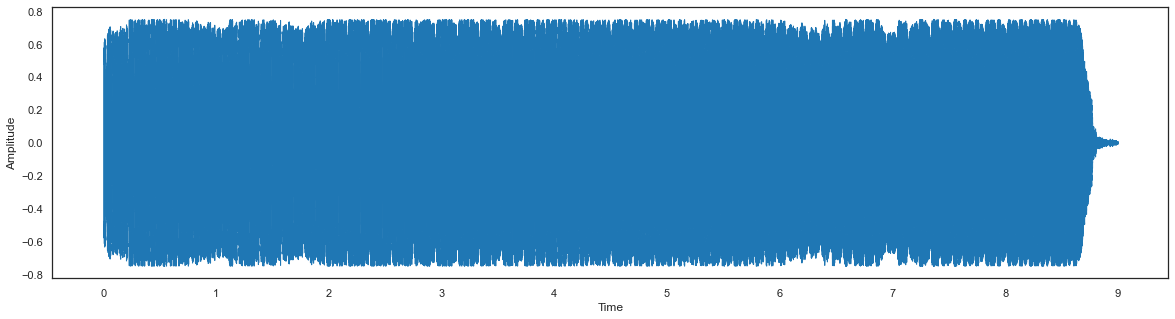

In [43]:
plt.figure(figsize=(20,5))
librosa.display.waveshow(artifact_sound_sample, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Spectrum

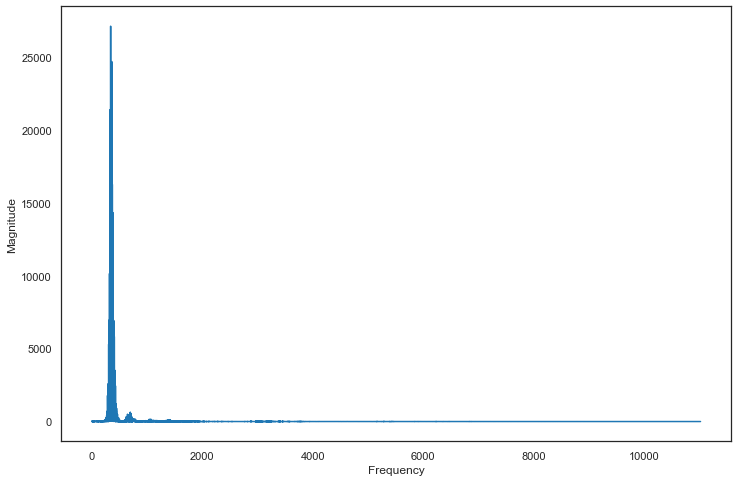

In [44]:
fft_artifact = np.fft.fft(artifact_sound_sample)
magnitude_artifact = np.abs(fft_artifact)
freq_artifact = np.linspace(0,sample_rate, len(magnitude_artifact)) 
half_freq = freq_artifact[:int(len(freq_artifact)/2)]
half_magnitude = magnitude_artifact[:int(len(freq_artifact)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### Spectogram

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram_artifacte')

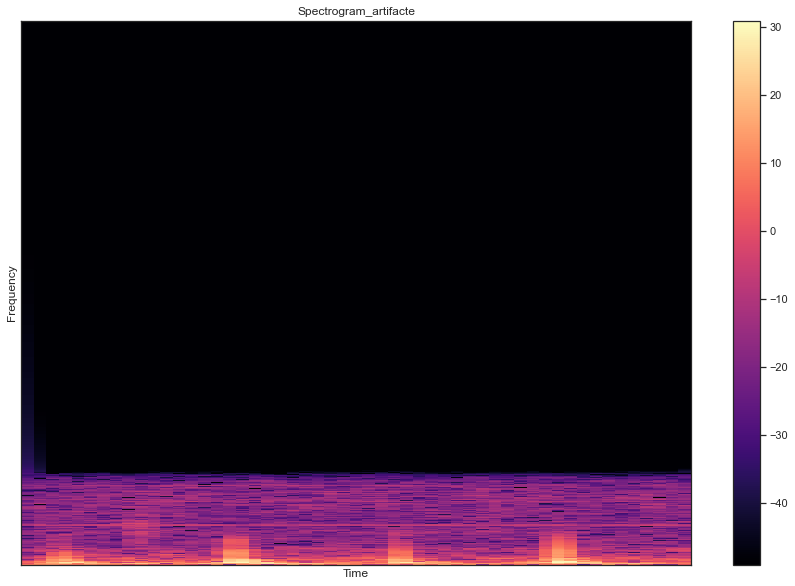

In [45]:
hop_length = 512
n_fft = 2048 

hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

stft_artifact = librosa.stft(artifact_sound_sample, n_fft=n_fft, hop_length=hop_length)

spectrogram_artifact = np.abs(stft_artifact)
log_spectrogram_artifact = librosa.amplitude_to_db(spectrogram_artifact)

plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("magma")
plt.title("Spectrogram_artifacte")

### MFCCs

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7676\512048462.py:3: FutureWarning: Pass y=[-0.06445935 -0.04742051  0.02168285 ...  0.00025723  0.00278857
  0.00549543], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs_artifact = librosa.feature.mfcc(artifact_sound_sample, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)


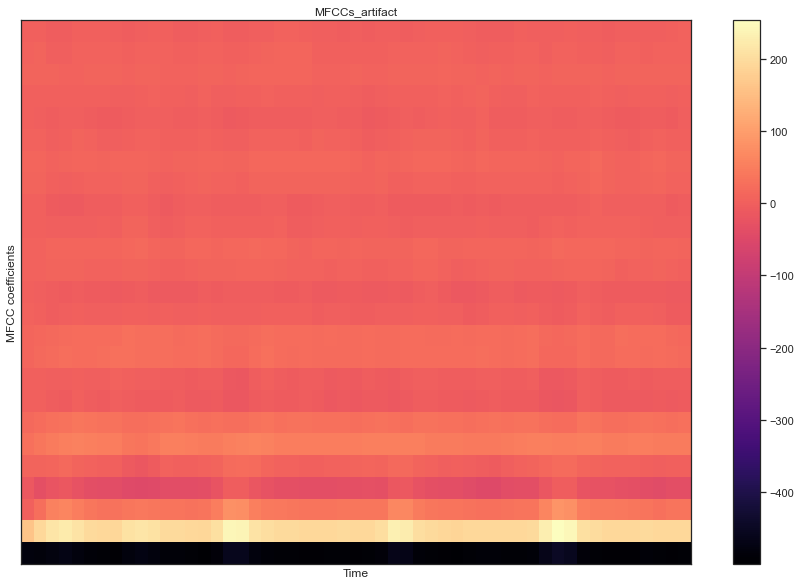

In [46]:
MFCCs_artifact = librosa.feature.mfcc(artifact_sound_sample, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.set_cmap("magma")
plt.title("MFCCs_artifact")
plt.show()

## *5. Extrahls sound*

In [47]:
random_extrahls= np.random.randint(0,len(os.listdir(extrahls_data))) 
extrahls_sound = os.listdir(extrahls_data)[random_extrahls]
extrahls_sound_address = extrahls_data+extrahls_sound
extrahls_sound_sample,sample_rate = librosa.load(extrahls_sound_address)
ipd.Audio(extrahls_sound_sample,rate=sample_rate)

### Waveform

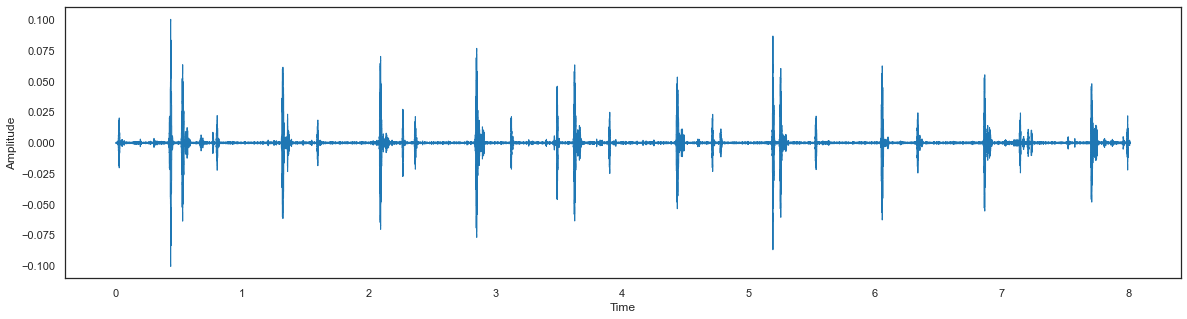

In [49]:
plt.figure(figsize=(20,5))
librosa.display.waveshow(extrahls_sound_sample, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Spectrum

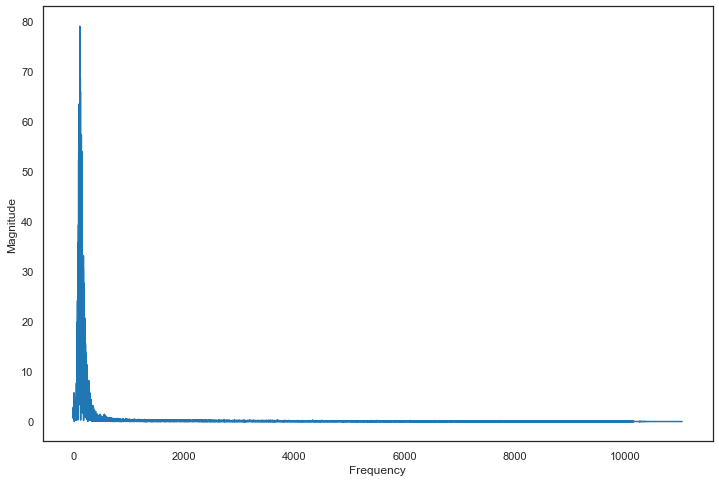

In [50]:
fft_extrahls = np.fft.fft(extrahls_sound_sample)
magnitude_extrahls = np.abs(fft_extrahls)
freq_extrahls = np.linspace(0,sample_rate, len(magnitude_extrahls)) 
half_freq = freq_extrahls[:int(len(freq_extrahls)/2)]
half_magnitude = magnitude_extrahls[:int(len(freq_extrahls)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### Spectogram

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram_extrahlse')

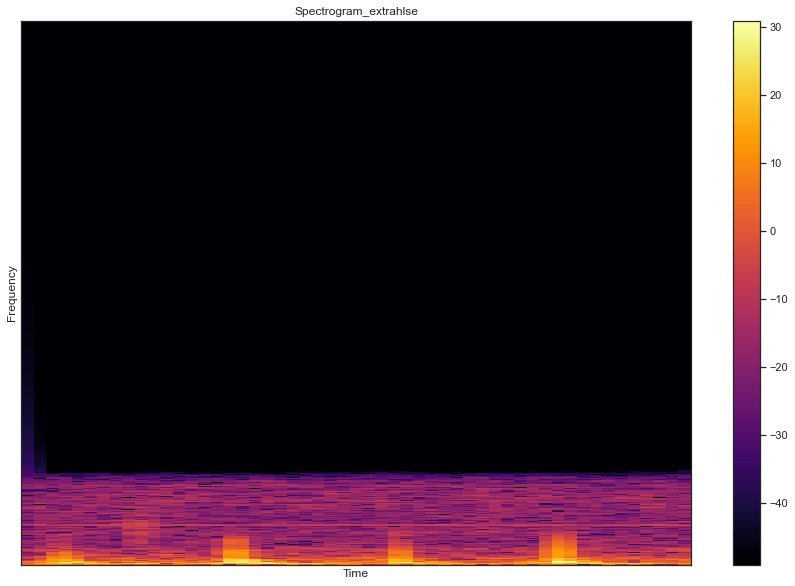

In [51]:
hop_length = 512
n_fft = 2048

hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

stft_extrahls = librosa.stft(extrahls_sound_sample, n_fft=n_fft, hop_length=hop_length)

spectrogram_extrahls = np.abs(stft_extrahls)
log_spectrogram_extrahls = librosa.amplitude_to_db(spectrogram_extrahls)

plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("inferno")
plt.title("Spectrogram_extrahlse")

### MFCCs

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7676\4058783737.py:3: FutureWarning: Pass y=[-2.1278996e-04 -4.0110268e-04 -2.4642280e-04 ...  8.9796660e-05
 -3.2202668e-05 -4.9406004e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs_extrahls = librosa.feature.mfcc(extrahls_sound_sample, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)


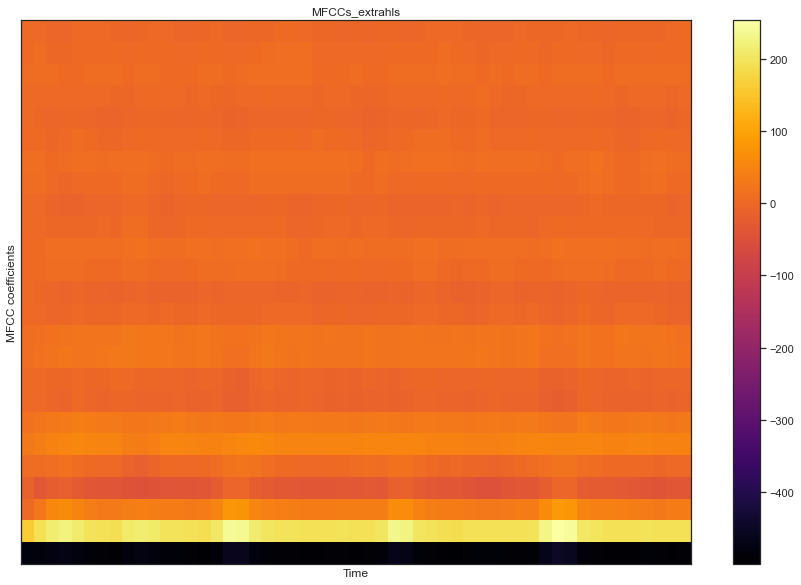

In [52]:
MFCCs_extrahls = librosa.feature.mfcc(extrahls_sound_sample, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.set_cmap("inferno")
plt.title("MFCCs_extrahls")
plt.show()

# Loading Data

In [53]:
def load_file_data (folder, file_names, duration=10, sr=22050):
    input_length=sr*duration
    data = []
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print ("load file ",sound_file)
            X, sr = librosa.load( sound_file, sr=sr, duration=duration) 
            dur = librosa.get_duration(y=X, sr=sr)
            # pad audio file same duration
            if (round(dur) < duration):
                print ("fixing audio lenght :", file_name)
                y = librosa.util.fix_length(X, input_length)                
            # extract normalized mfcc feature from data
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=25).T,axis=0)             
        except Exception as e:
            print("Error encountered while parsing file: ", file)        
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data

# Preprocessing

## *Encoding*

In [54]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

CLASSES = ['artifact','murmur','normal']
NB_CLASSES=len(CLASSES)

label_to_int = {k:v for v,k in enumerate(CLASSES)}
print (label_to_int)
print (" ")
int_to_label = {v:k for k,v in label_to_int.items()}
print(int_to_label)

{'artifact': 0, 'murmur': 1, 'normal': 2}
 
{0: 'artifact', 1: 'murmur', 2: 'normal'}


In [55]:
SAMPLE_RATE = 22050
MAX_SOUND_CLIP_DURATION=10

artifact_files = fnmatch.filter(os.listdir(artifact_data), 'artifact*.wav')
artifact_sounds = load_file_data (folder=artifact_data, file_names = artifact_files, duration=MAX_SOUND_CLIP_DURATION)
artifact_labels = [0 for items in artifact_files]

normal_files = fnmatch.filter(os.listdir(normal_data), 'normal*.wav')
normal_sounds = load_file_data(folder=normal_data,file_names=normal_files, duration=MAX_SOUND_CLIP_DURATION)
normal_labels = [2 for items in normal_sounds]

extrahls_files = fnmatch.filter(os.listdir(extrahls_data), 'extrahls*.wav')
extrahls_sounds = load_file_data(folder=extrahls_data,file_names=extrahls_files, duration=MAX_SOUND_CLIP_DURATION)
extrahls_labels = [2 for items in extrahls_sounds]

murmur_files = fnmatch.filter(os.listdir(murmur_data), 'murmur*.wav')
murmur_sounds = load_file_data(folder=murmur_data,file_names=murmur_files, duration=MAX_SOUND_CLIP_DURATION)
murmur_labels = [1 for items in murmur_files]

extrastole_files = fnmatch.filter(os.listdir(extrastole_data), 'extrastole*.wav')
extrastole_sounds = load_file_data(folder=extrastole_data,file_names=extrastole_files, duration=MAX_SOUND_CLIP_DURATION)
extrastole_labels = [2 for items in extrastole_files]

print ("Loading Done")


load file  ./heartbeat//normal/normal_noisynormal_101_1305030823364_B.wav
fixing audio lenght : normal_noisynormal_101_1305030823364_B.wav
load file  ./heartbeat//normal/normal_noisynormal_101_1305030823364_E.wav


C:\Users\ASUS\AppData\Local\Temp\ipykernel_7676\1063719324.py:13: FutureWarning: Pass size=220500 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y = librosa.util.fix_length(X, input_length)


fixing audio lenght : normal_noisynormal_101_1305030823364_E.wav
load file  ./heartbeat//normal/normal_noisynormal_104_1305032492469_A.wav
load file  ./heartbeat//normal/normal_noisynormal_105_1305033453095_A.wav
load file  ./heartbeat//normal/normal_noisynormal_105_1305033453095_C.wav
fixing audio lenght : normal_noisynormal_105_1305033453095_C.wav
load file  ./heartbeat//normal/normal_noisynormal_106_1306776721273_A.wav
fixing audio lenght : normal_noisynormal_106_1306776721273_A.wav
load file  ./heartbeat//normal/normal_noisynormal_107_1305654946865_A.wav
fixing audio lenght : normal_noisynormal_107_1305654946865_A.wav
load file  ./heartbeat//normal/normal_noisynormal_108_1305654420093_A.wav
fixing audio lenght : normal_noisynormal_108_1305654420093_A.wav
load file  ./heartbeat//normal/normal_noisynormal_108_1305654420093_B.wav
load file  ./heartbeat//normal/normal_noisynormal_109_1305653646620_A.wav
load file  ./heartbeat//normal/normal_noisynormal_109_1305653972028_A.wav
fixing au

load file  ./heartbeat//normal/normal_noisynormal_155_1306935902813_C.wav
fixing audio lenght : normal_noisynormal_155_1306935902813_C.wav
load file  ./heartbeat//normal/normal_noisynormal_157_1306937583792_A.wav
load file  ./heartbeat//normal/normal_noisynormal_157_1306937583792_B.wav
load file  ./heartbeat//normal/normal_noisynormal_158_1306947254705_B1.wav
fixing audio lenght : normal_noisynormal_158_1306947254705_B1.wav
load file  ./heartbeat//normal/normal_noisynormal_158_1306947254705_D.wav
load file  ./heartbeat//normal/normal_noisynormal_159_1307018640315_A1.wav
fixing audio lenght : normal_noisynormal_159_1307018640315_A1.wav
load file  ./heartbeat//normal/normal_noisynormal_159_1307018640315_B.wav
fixing audio lenght : normal_noisynormal_159_1307018640315_B.wav
load file  ./heartbeat//normal/normal_noisynormal_163_1307104470471_D1.wav
fixing audio lenght : normal_noisynormal_163_1307104470471_D1.wav
load file  ./heartbeat//normal/normal_noisynormal_167_1307111318050_A1.wav
fi

fixing audio lenght : normal__137_1306764999211_D.wav
load file  ./heartbeat//normal/normal__139_1306519274653_A.wav
fixing audio lenght : normal__139_1306519274653_A.wav
load file  ./heartbeat//normal/normal__140_1306519735121_A.wav
load file  ./heartbeat//normal/normal__140_1306519735121_B.wav
load file  ./heartbeat//normal/normal__140_1306519735121_D1.wav
fixing audio lenght : normal__140_1306519735121_D1.wav
load file  ./heartbeat//normal/normal__141_1306520154450_B.wav
fixing audio lenght : normal__141_1306520154450_B.wav
load file  ./heartbeat//normal/normal__141_1306520154450_C.wav
fixing audio lenght : normal__141_1306520154450_C.wav
load file  ./heartbeat//normal/normal__143_1306763822290_B.wav
fixing audio lenght : normal__143_1306763822290_B.wav
load file  ./heartbeat//normal/normal__143_1306763822290_C.wav
fixing audio lenght : normal__143_1306763822290_C.wav
load file  ./heartbeat//normal/normal__145_1307987561278_B.wav
fixing audio lenght : normal__145_1307987561278_B.wav

load file  ./heartbeat//normal/normal__183_1308072703477_B.wav
fixing audio lenght : normal__183_1308072703477_B.wav
load file  ./heartbeat//normal/normal__183_1308072703477_C.wav
fixing audio lenght : normal__183_1308072703477_C.wav
load file  ./heartbeat//normal/normal__184_1308073010307_B.wav
load file  ./heartbeat//normal/normal__184_1308073010307_D.wav
load file  ./heartbeat//normal/normal__186_1308073648738_C1.wav
fixing audio lenght : normal__186_1308073648738_C1.wav
load file  ./heartbeat//normal/normal__186_1308073648738_D.wav
fixing audio lenght : normal__186_1308073648738_D.wav
load file  ./heartbeat//normal/normal__188_1308074301731_C.wav
fixing audio lenght : normal__188_1308074301731_C.wav
load file  ./heartbeat//normal/normal__188_1308074301731_D.wav
fixing audio lenght : normal__188_1308074301731_D.wav
load file  ./heartbeat//normal/normal__190_1308076920011_C1.wav
fixing audio lenght : normal__190_1308076920011_C1.wav
load file  ./heartbeat//normal/normal__190_13080769

fixing audio lenght : normal__230_1308595300880_C.wav
load file  ./heartbeat//normal/normal__232_1308748524018_A.wav
fixing audio lenght : normal__232_1308748524018_A.wav
load file  ./heartbeat//normal/normal__232_1308748524018_B.wav
fixing audio lenght : normal__232_1308748524018_B.wav
load file  ./heartbeat//normal/normal__232_1308748524018_B1.wav
fixing audio lenght : normal__232_1308748524018_B1.wav
load file  ./heartbeat//normal/normal__232_1308748524018_C.wav
fixing audio lenght : normal__232_1308748524018_C.wav
load file  ./heartbeat//normal/normal__232_1308748524018_D1.wav
fixing audio lenght : normal__232_1308748524018_D1.wav
load file  ./heartbeat//normal/normal__235_1308749032454_C.wav
fixing audio lenght : normal__235_1308749032454_C.wav
load file  ./heartbeat//normal/normal__235_1308749032454_D.wav
fixing audio lenght : normal__235_1308749032454_D.wav
load file  ./heartbeat//normal/normal__237_1308750231222_C.wav
fixing audio lenght : normal__237_1308750231222_C.wav
load f

load file  ./heartbeat//murmur/murmur_noisymurmur_292_1311185449649_D.wav
fixing audio lenght : murmur_noisymurmur_292_1311185449649_D.wav
load file  ./heartbeat//murmur/murmur_noisymurmur_293_1311680805936_C.wav
load file  ./heartbeat//murmur/murmur_noisymurmur_293_1311680805936_D.wav
Loading Done


In [56]:
Bunlabelledtest_files = fnmatch.filter(os.listdir(unlabel_data), 'Bunlabelledtest*.wav')
Bunlabelledtest_sounds = load_file_data(folder=unlabel_data,file_names=Bunlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
Bunlabelledtest_labels = [-1 for items in Bunlabelledtest_sounds]

Aunlabelledtest_files = fnmatch.filter(os.listdir(unlabel_data), 'Aunlabelledtest*.wav')
Aunlabelledtest_sounds = load_file_data(folder=unlabel_data,file_names=Aunlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
Aunlabelledtest_labels = [-1 for items in Aunlabelledtest_sounds]


print ("Loading of unlabel data done")

Loading of unlabel data done


## *concatenation*

In [85]:
x_data = np.concatenate((artifact_sounds, normal_sounds, extrahls_sounds, murmur_sounds, extrastole_sounds))

y_data = np.concatenate((artifact_labels, normal_labels, extrahls_labels, murmur_labels, extrastole_labels))

test_x = np.concatenate((Aunlabelledtest_sounds,Bunlabelledtest_sounds))
test_y = np.concatenate((Aunlabelledtest_labels,Bunlabelledtest_labels))

print ("combined training data record: ",len(y_data), len(test_y))

combined training data record:  380 0


In [86]:
x_data.shape

(380,)

## *train_test_validation split*

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.8, random_state=42, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=42, shuffle=True)

y_train = np.array(tf.keras.utils.to_categorical(y_train, len(CLASSES)))
y_test = np.array(tf.keras.utils.to_categorical(y_test, len(CLASSES)))
y_val = np.array(tf.keras.utils.to_categorical(y_val, len(CLASSES)))
test_y=np.array(tf.keras.utils.to_categorical(test_y, len(CLASSES)))

### Correct imbalanced data using class weight

In [ ]:
TRAIN_IMG_COUNT = 578
COUNT_0 = 40  
COUNT_1 = 129 
COUNT_2 = 409 
weight_for_0 = TRAIN_IMG_COUNT / (3 * COUNT_0)
weight_for_1 = TRAIN_IMG_COUNT / (3 * COUNT_1)
weight_for_2 = TRAIN_IMG_COUNT / (3 * COUNT_2)
class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}
class_weight

# LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, LSTM, Bidirectional, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau, ModelCheckpoint,TensorBoard,ProgbarLogger
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
model = Sequential()

model.add(Bidirectional(LSTM(128, dropout=0.05, recurrent_dropout=0.20, return_sequences=True), input_shape = (25,1)))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Flatten())

model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=['acc'])

model.summary()

In [ ]:
weight_saver = ModelCheckpoint('set_a_weights.h5', monitor='val_loss', 
                               save_best_only=True, save_weights_only=True)
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.8**x)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
history=model.fit(x_train, y_train, 
                  batch_size=3, 
                  epochs=30,
                  class_weight=class_weight,
                  callbacks=[weight_saver, annealer],
                  validation_data=(x_val, y_val)) 

In [ ]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [ ]:
losses[['acc','val_acc']].plot()

# Prediction

In [ ]:
y_pred = model.predict(x_test, batch_size=5)
scores = model.evaluate(x_test, y_test)
print ("Model evaluation accuracy: ", round(scores[1]*100),"%")

# Saving and loading model

In [ ]:
model.save('heart_sounds.h5')

In [ ]:
# prediction class 
y_pred = np.asarray(model.predict(x_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)
print ("prediction test return :",y_pred[1], "-", int_to_label[y_pred[1]])

In [ ]:
def preprocessing (file_path, duration=10, sr=22050):
  input_length=sr*duration
  process_file=[]
  X, sr = librosa.load(file_path, sr=sr, duration=duration) 
  dur = librosa.get_duration(y=X, sr=sr)
  if (round(dur) < duration):
    y = librosa.util.fix_length(X, input_length)                
  mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40, n_fft=512,hop_length=2048).T,axis=0)
  feature = np.array(mfccs).reshape([-1,1])
  process_file.append(feature)
  process_file_array = np.asarray(process_file)
  return process_file_array

In [ ]:
y_pred = np.asarray(model.predict(x_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)

In [ ]:
target_names = ["artifact", "murmur","normal"]
print(classification_report(y_test.argmax(axis=1), y_pred, target_names = target_names))